# K-Means Clustering

Dataset Description:
Instances in this dataset contain audio features extracted from 1059 wave files. The data is labelled based on the geographical origin of music (33 classes/countries/areas).
Note:​ Use the class labels only to verify the performance of the clustering.
116 columns are audio features of the track, and the last one columns are the origin of
the music.

Source:​ http://archive.ics.uci.edu/ml/datasets/geographical+original+of+music

    
Task 

The task is to perform clustering on the given dataset using k-means algorithm and experiment with the following specifications.

    Initialization:​ Random
   
    Distance measure:​ ​Euclidean Distance

    Evaluation metrics:​ Rand Index, SSE (same as WCSS)

    Stopping Criteria: ​Your choice (simple loop with maximum 200 iterations is enough)

You should Plot the Rand Index and SSE with the 8 different k values, of your choice.

What you think is the best k for this dataset? Give justification about your choice.



## Importing required libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing
import copy

## Importing data

In [0]:
data = pd.read_csv("default_plus_chromatic_features_1059_tracks_new.csv", header = None)

Transforming the dataframe to include an "ID" Column and renamimg labeled column as "Labels"

In [0]:
data = data.rename(columns = {116 : 'Labels'})
data.insert(0,"ID",data.index)

## Frequency encoding the labels

In [0]:
def freq_encoder(data):
    #Transforming the data frame to include a frequency of label column
    data_copy = copy.deepcopy(data.assign(freq=data.groupby('Labels')['ID'].transform('count')).sort_values(by=['freq','ID'],ascending=[False,True]))
    data_copy.insert(0,"ind",data.index)
    #Inserting a sudo Indexing column
    
    e=list(data_copy['ind'])
    l=list(data_copy['Labels'])
    #sudo Indeces and labels 
    
    indexes = np.unique(l, return_index=True)[1]
    Freq_sorted_Unique = [l[index] for index in sorted(indexes)]
    #The frequency of label column sorted descendingly
    
    li = (np.arange(len(Freq_sorted_Unique)))
    #Encoding each frequency count to value between 0-32
    
    y = np.zeros(len(e))
    
    for i in range(0,len(l)): 
        for j in range(0,len(Freq_sorted_Unique)):
            if l[i] == Freq_sorted_Unique[j]:
                y[i] = li[j]
    #y contains the encoded labels           
                
    #Extracting features and labels to X,Y
    Y = copy.deepcopy(data_copy.iloc[:,len(data_copy.columns)-2])
    X1 = copy.deepcopy(data_copy.drop(data_copy.columns[len(data_copy.columns)-1], axis=1))
    X = copy.deepcopy(data_copy.iloc[:,2:len(data_copy.columns)-2]).reset_index(inplace = False).iloc[:,1:len(data_copy.columns)-1]
    return(data_copy,y,X,Y)

## Label Encoding

In [0]:
def label(data):
    #Extracting features and labels to X,Y
    Y = copy.deepcopy(data.iloc[:,len(data.columns)-1])
    X1 = copy.deepcopy(data.drop(data.columns[len(data.columns)-1], axis=1))
    X = copy.deepcopy(data.iloc[:,1:len(data.columns)-1])
    
    #Label Encoder as found in preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(Y)
    Y_encoded=le.transform(Y)
    
    return(Y_encoded,X,Y)

## Visualize function

In [0]:
def visual(k_index,RI,SSE,text1):
    #Figure with 2 plots
    fig, axs = plt.subplots(1, 2, figsize=(20, 8), sharey=False)
    fig.suptitle(text1, fontsize=16)
    
    #Subplot 1 : K cluster vs Adjusted Rand Index
    axs[0].plot(k_index, RI)
    axs[0].set_xlabel('K clusters')
    axs[0].set_ylabel('Adjusted Rand Index (ARI)')
    axs[0].set_title('K cluster vs Adjusted Rand Index')
    
    #Subplot 2 : K cluster vs Sum of Squared Errors (SSE)
    axs[1].plot(k_index, SSE)
    axs[1].set_xlabel('K clusters')
    axs[1].set_ylabel('Sum of Squared Errors (SSE)')
    axs[1].set_title('K cluster vs Sum of Squared Errors (SSE)')

## A comparision between encoding techniques

In [0]:
#Frequency encoded
data_freq,Y_freq_enc,X_freq,Y_freq = freq_encoder(data)

#LabelEncoder
Y_label_enc,X_label,Y_label = label(data)

## K means clustering with Label Frequency Encoding

K Clusters,5,15,25,35,45,55,65,75,80,100
RI,0.017,0.0441,0.0601,0.07,0.0701,0.0714,0.0674,0.075,0.0653,0.0658
SSE(rounded),73718,58472,52072,48595,45962,43747,42484,41254,40786,38084


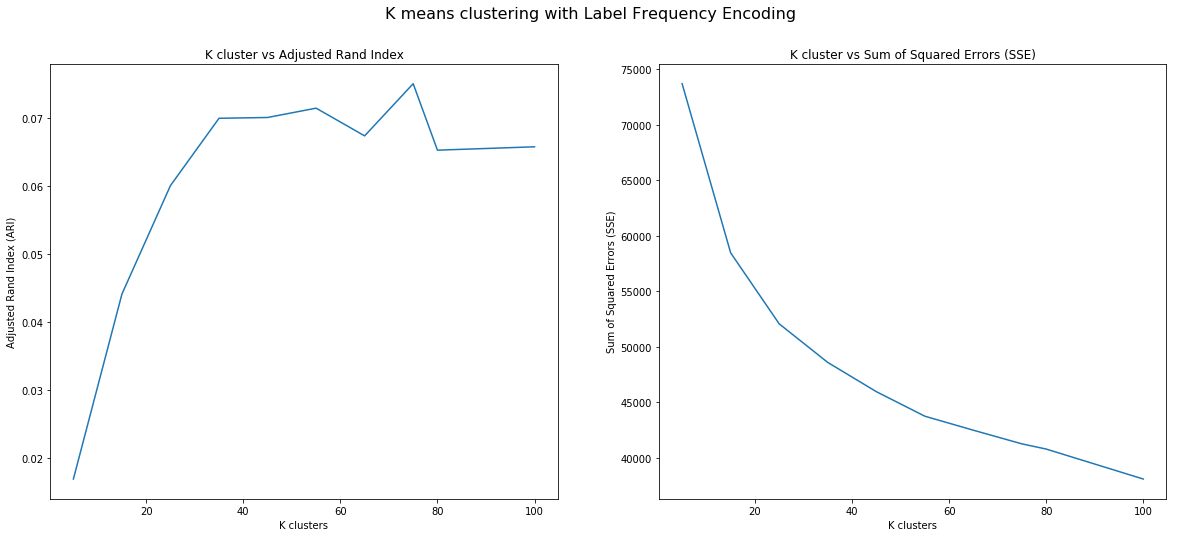

In [0]:
SSE = []
RI = []

#Number of clusters to interate upon
k_index = [5,15,25,35,45,55,65,75,80,100]

for k in k_index:
    kmeans = KMeans(n_clusters=k, init='random', random_state=12, n_init=10, max_iter=100)
    pred_labels = kmeans.fit(X_freq).labels_
    SSE.append(kmeans.inertia_ )
    RI.append(adjusted_rand_score(Y_freq_enc,pred_labels))
    
#Visualising the Plots
visual(k_index,RI,SSE,'K means clustering with Label Frequency Encoding')
#plt.savefig('K means clustering with Label Frequency Encoding')

#Tabling the SSE and RI scores
table_freq = pd.DataFrame([np.round(RI,4),pd.Series(SSE).astype('int32')], columns = k_index, index =  ("RI","SSE(rounded)"), dtype = object).rename_axis('K Clusters', axis=1)
#table_freq.to_csv("K means clustering with Label Frequency Encoding.csv")
display(table_freq)

## K means clustering with Label Encoder

K Clusters,5,15,25,35,45,55,65,75,80,100
RI,0.017,0.0461,0.0536,0.0753,0.0655,0.0652,0.0723,0.0678,0.0737,0.0792
SSE(rounded),73718,58339,52294,48803,46347,43812,42654,41006,40545,38218


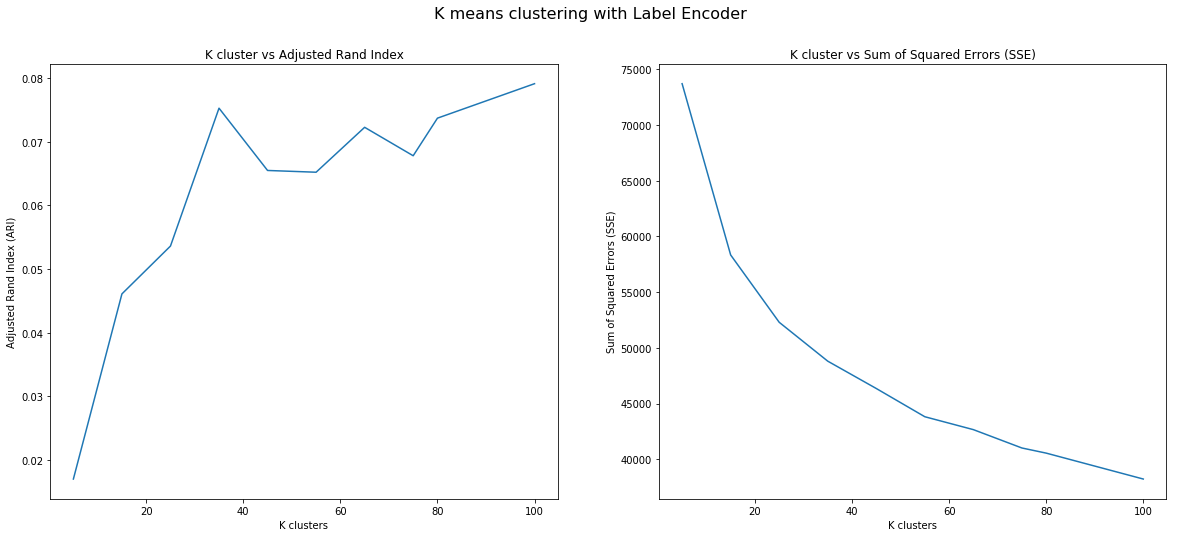

In [0]:
SSE = []
RI = []

#Number of clusters to interate upon
k_index = [5,15,25,35,45,55,65,75,80,100]

for k in k_index:
    kmeans = KMeans(n_clusters=k, init='random', random_state=12, n_init=10, max_iter=100)
    pred_labels = kmeans.fit(X_label).labels_
    SSE.append(kmeans.inertia_ )
    RI.append(adjusted_rand_score(Y_label_enc,pred_labels))
    
#Visualising the Plots   
visual(k_index,RI,SSE,'K means clustering with Label Encoder')
#plt.savefig('K means clustering with Label Encoder')

#Tabling the SSE and RI scores
table_label = pd.DataFrame([np.round(RI,4),pd.Series(SSE).astype('int32')], columns = k_index, index =  ("RI","SSE(rounded)"), dtype = object).rename_axis('K Clusters', axis=1)
#table_label.to_csv("K means clustering with Label Encoder.csv")
display(table_label)

**Observation**

Frequency Encoder : 
    
    We can observe that frequency encoder has a table around 30-50 cluster after which there lies an 'Anamoly' and then value decreases. 
    One can say that Taking 30<K<50 is a best choice as it returns best fit
    
Label Encoder : 
    
    The graph shows a spike around 30 clusters after which there is irregular pattern in the graph, making it hard to judge best K


**Analysis**

Based on Rand Index, choosing **K = 35 or K = 40** appeared best available choice, but since the value is ~0.07,
the math isn't strong enough to support the choice.

Based on SSE, choosing **K** becomes a difficult choice as the elbow isn't clearly demarkated. 
The SSE graph shows 2 elbows, most prominent being 15.